In [84]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
level=[]
level=[i for i in range(1,26)]
len(level)

25

In [86]:
salary=[i**3 for i in range(1,50) if i%2==1]
len(salary)

25

In [87]:
df=pd.DataFrame({'Level':level,'Salary':salary})
df.to_csv('LevelSalary.csv')

In [88]:
df = pd.read_csv("LevelSalary.csv",index_col=[0])
df.head()

,Level,Salary
0,1,1
1,2,27
2,3,125
3,4,343
4,5,729


25 rows ,2 cols,both data integer.No null value.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   25 non-null     int64
 1   Salary  25 non-null     int64
dtypes: int64(2)
memory usage: 600.0 bytes


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   25 non-null     int64
 1   Salary  25 non-null     int64
dtypes: int64(2)
memory usage: 600.0 bytes


In [91]:
df.describe()

,Level,Salary
count,25.000000,25.000000
mean,13.000000,31225.000000
std,7.359801,36097.351934
min,1.000000,1.000000
25%,7.000000,2197.000000
50%,13.000000,15625.000000
75%,19.000000,50653.000000
max,25.000000,117649.000000


Both mean and median is 13,i.e. data is normally distributed. But ther is a difference between mean salary and median salary. Mean salary is 
Both mean and median is 13,i.e. data is normally distributed. But ther is a difference between mean salary and median salary. Mean salary is 31225,Median is 15625, that is skewness is in salary col.

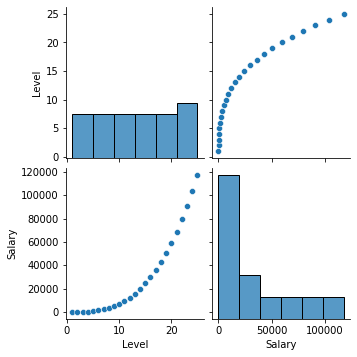

In [92]:
sns.pairplot(df)

In [93]:
df.corr()

,Level,Salary
Level,1.000000,0.916923
Salary,0.916923,1.000000


In [94]:
x = df.iloc[:, :-1] # all the rows, except last col
y = df.iloc[:, -1] #all the rows of last col

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x,y)
ypred = linreg.predict(x)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y, ypred)
mse = mean_squared_error(y, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y, ypred)

print(f"MAE : {mse}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 199208056.32
MSE : 199208056.32
RMSE : 14114.10841392399
Accuracy : 0.840747969756231


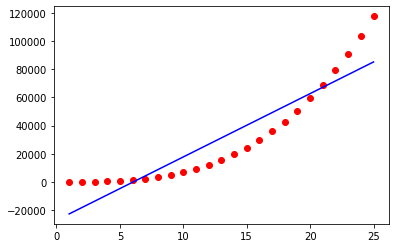

In [97]:
plt.scatter(x,y, color="red")
plt.plot(x, ypred, color="blue")

Data is curved and not linear.Therefore,we want our regression line to be curved too.

# Data Viz

In [98]:
a = np.arange(1, 11)
b = a

In [99]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [100]:
b

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

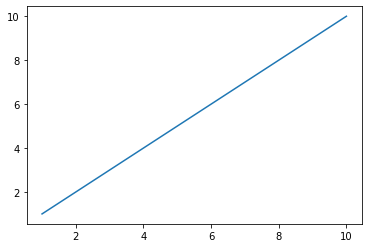

In [101]:
plt.plot(a,b)

Now, we will plot with some degree to b.

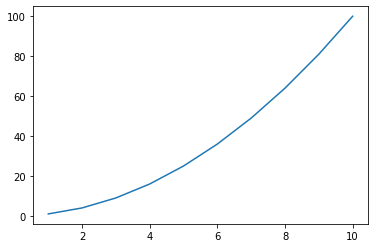

In [102]:
plt.plot(a, b**2)

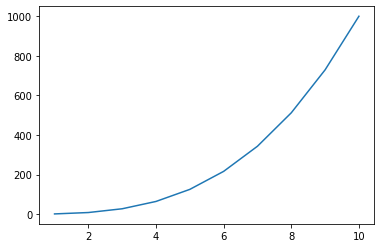

In [103]:
plt.plot(a, b**3)

# Polynomial Regression

In [104]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
xp = pf.fit_transform(x)

In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xp,y)
ypred = linreg.predict(xp)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y, ypred)
mse = mean_squared_error(y, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(y, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 2019.0720000000001
MSE : 5456056.319999994
RMSE : 2335.8202670582327
Accuracy : 0.9956382886207744


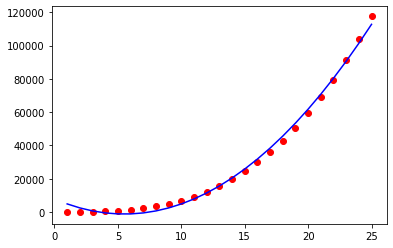

In [106]:
plt.scatter(x,y, color="red")
plt.plot(x, ypred, color="blue")

In [107]:
y

0          1
1         27
2        125
3        343
4        729
5       1331
6       2197
7       3375
8       4913
9       6859
10      9261
11     12167
12     15625
13     19683
14     24389
15     29791
16     35937
17     42875
18     50653
19     59319
20     68921
21     79507
22     91125
23    103823
24    117649
Name: Salary, dtype: int64